# Decision Trees

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [3]:
X_train

array([[1.989e+01, 2.026e+01, 1.305e+02, ..., 1.613e-01, 2.549e-01,
        9.136e-02],
       [1.289e+01, 1.312e+01, 8.189e+01, ..., 5.366e-02, 2.309e-01,
        6.915e-02],
       [1.714e+01, 1.640e+01, 1.160e+02, ..., 2.550e-01, 4.066e-01,
        1.059e-01],
       ...,
       [1.546e+01, 2.395e+01, 1.038e+02, ..., 2.163e-01, 3.013e-01,
        1.067e-01],
       [1.705e+01, 1.908e+01, 1.134e+02, ..., 2.543e-01, 3.109e-01,
        9.061e-02],
       [9.777e+00, 1.699e+01, 6.250e+01, ..., 5.334e-02, 2.533e-01,
        8.468e-02]])

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree

dotfile = open("dtree.dot", 'w')
tree.export_graphviz(clf, out_file = dotfile)
dotfile.close()

# tree.export_graphviz(clf)

In [5]:
! dot -Tpng dtree.dot -o tree.png

In [6]:
# tree.plot_tree(clf)

In [ ]:
criterion='gini',
splitter='best',
max_depth=None,
min_samples_split=2,
min_samples_leaf=1,
min_weight_fraction_leaf=0.0,
max_features=None,
random_state=None,
max_leaf_nodes=None,
min_impurity_decrease=0.0,
min_impurity_split=None,
class_weight=None,
presort=False,

## Ensemble of Decision Trees

In [7]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest = forest.fit(X_train, y_train)

### Analysing Random Forest

In [8]:
import mglearn
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


* We can clearly see that the decision boundaries learned by the five trees are quite different. 
* Each of them makes some mistakes, as some of the training points that are
plotted here were not actually included in the training sets of the trees, due to the `bootstrap sampling`.

### Building Random forest consisting of 100 trees on the Breast Cancer dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


* The feature importances provided by the random forest are more reliable than the ones provided by a single tree

## Gradient Boosting Machies

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


### Analysis

* As the training set accuracy is 100%, we are likely to be overfitting. 
* To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:

### Limit Maximum Depth

In [14]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


### Lower the Learning Rate

In [15]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


### Analysis:
* Both methods of decreasing the model complexity reduced the training set accuracy, as expected. 
* In this case, lowering the maximum depth of the trees provided a significant improvement of the model, 
while lowering the learning rate only increased the generalization performance slightly.

### Visualize Feature Importance

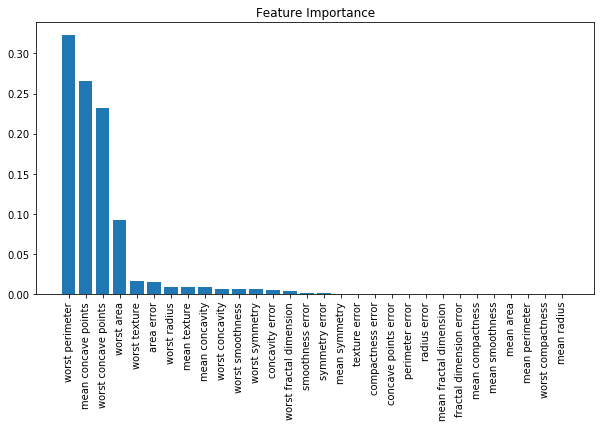

In [13]:
import numpy as np
from matplotlib import pyplot as plt
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
importances = gbrt.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [cancer.feature_names[i] for i in indices]
# Create plot
plt.figure(figsize=(10,5))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)
# Show plot
plt.show()